[View in Colaboratory](https://colab.research.google.com/github/xiaorongY/aml/blob/master/HW1_xy2347.ipynb)

# GR5242 Homework 1
+ Problem 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import math
from scipy.linalg import schur
from scipy.linalg import solve

a)  \
i) The left one has an invariant distribution, but it is not unique.
 Because both steps after vetex 3 and 4 would be constant 4 or 3 respectively.
 And there is no path between vetex 3 and 4, which makes the chain not irreducible and the invariant distribution not unique. \
 ii) The right one has an invariant distribution and it is unique.
 Because through computation we find that the distribution of P = [1/3, 1/3, 1/3]' is an equilibrium distribution.  We get the equilibrium by solving:  \
 p = np.array([[0,0,1],[1,0,0],[0,1,0]]) \
 P = [p1, p2, p3] \
 np.dot(p, P) = P \
 p1 + p2 + p3 = 1 \
 the solution is: p1 = p2 = p3 = 1/3 \
 So the Markov chain has an unique invariant distribution.

b)
 The gambler's fallacy constitue a hidden Markov model for the sequence X1, ..., Xn.
 Because firstly, the sequence of the money the player win is actually a hidden variable, 
 while the state we want to knoe is whether this player is lucky or unlucky.  Secondly, the sequence has long-range dependence, since there must be successive loss before gain.
 So the sequence is a hidden Markov model.

- Problem 2 

In [0]:
# a)
# define a function to compute the diagnol sqaure root of a matrix

def dsqrt(mat):
    dq = []
    for i in range(len(mat)):
        dq.append(np.sqrt(mat[i,i]))
    return np.diag(dq)
    
# define the function to produce n draws from a d-dimensional Gaussian.

def GSAMPLE(mu, Sigma, n):
    G = []
    D, V = schur(Sigma)
    g = np.random.multivariate_normal([0]*len(mu) , np.identity(len(mu)), n)
    for i in range(n):
        Gi = np.dot(np.dot(V, dsqrt(D)), np.transpose(g[i])) + np.transpose(mu)
        G.append(Gi)
    return np.array(G)

In [0]:
# verify on a 2 dimensional multivariate distribution with mu = [1, 1], sigma = [[2,1],[1,2]]

sample_1 = GSAMPLE([1,1], [[2,1],[1,2]], 1000)

In [0]:
# compute sample mean

np.mean(sample_1[:, 0])

1.0496742852916845

In [0]:
np.mean(sample_1[:, 1])

1.0061621235994407

In [0]:
# compute sample covariance

np.cov(sample_1[:, 0], sample_1[:, 1])

array([[2.12185614, 0.96034294],
       [0.96034294, 1.96558664]])

In [0]:
# c) 
# i) produce 100 samples using parameter values mu = [1, 1], sigma = [[2, 1], [1, 2]]

mu_2 = [1,1]
sigma_2 = [[2, 1], [1, 2]]
sample_2 = GSAMPLE(mu_2, sigma_2, 100)

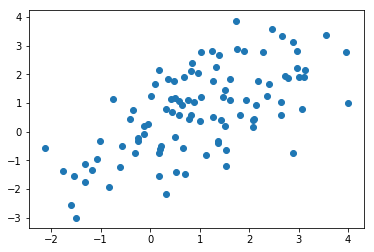

In [0]:
# prepare for the plot

x_2 = sample_2[:,0]
y_2 = sample_2[:,1]
# show the plot

plt.scatter(x_2, y_2)
plt.show()

In [0]:
# ii) produce 100 samples using parameter values mu = [1, 1, 1], sigma = [[5, 2, 0], [2, 3, 1], [0, 1, 1]]

mu_3 = [1, 1, 1]
sigma_3 = [[5, 2, 0], [2, 3, 1], [0, 1, 1]]
sample_3 = GSAMPLE(mu_3, sigma_3, 100)

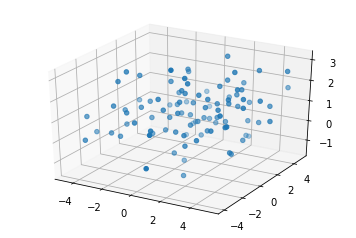

In [0]:
# prepare for the plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_3 = sample_3[:, 0]
y_3 = sample_3[:, 1]
z_3 = sample_3[:, 2]
# show the plot

ax.scatter(x_3, y_3, z_3)
plt.show()

- Problem 3

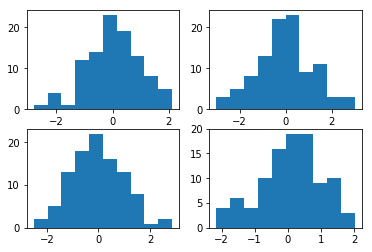

In [0]:
# a) 4 histograms with n = 100 and Nbins = 10

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.hist(np.random.randn(100), 10)
plt.show()

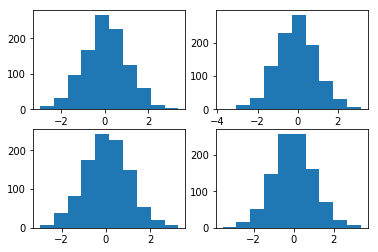

In [0]:
# b) repeat with n = 1000

for i in range(4):
    plt.subplot(2, 2, i + 1)
    plt.hist(np.random.randn(1000), 10)
plt.show()

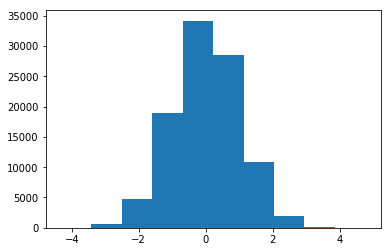

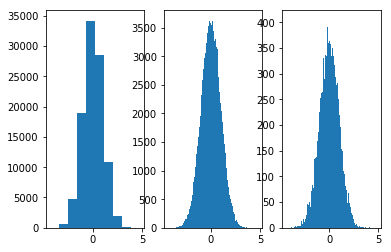

In [0]:
# c) for n = 100000, plot for Nbins = 10, 100, 1000 respectively

np.random.seed(11)
draw_1 = np.random.randn(100000)
plt.hist(draw_1, 10)
plt.show()
nb = [10, 100, 1000]
for b in range(3):
    plt.subplot(1, 3, b + 1)
    plt.hist(draw_1, nb[b])
plt.show()

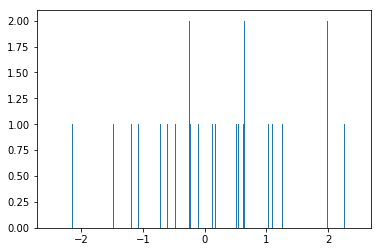

In [0]:
# d) n = 100, Nbins = 1000

plt.hist(np.random.randn(100), 1000)
plt.show()

 e) A biref discussion: \
 From the plots in a) and b), we could see that with the same number of bins, the larger the sample size is,  the closer the sample distribution is to the truth. \
  From the plots in c), we can conclude that larger sample size would generate more accurate estimates of the true distribution. But a too small or large amount of bins can eliminate the accuracy improved by sufficient samples. So choosing a moderate bin number could be crucial. \
  From the plot in d), we can see that the bin number should exceed the number of samples, otherwise there would be empty bins providing little information about the true distribution. \
 In conclusion, larger sample size often means better estimate and the number of bins should be the one by multiple trials
 making the distribution smooth.